##  Data Visualization

In this notebook, we’ll visualize key insights from the Stack Overflow Developer Survey.  
Since the dataset is in a relational format, we’ll use **SQL queries** to extract specific data for each chart.

We’ll focus on four main types of visualizations:

- **Distribution** – to understand how values like salary or experience are spread  
- **Relationships** – to explore how two variables interact  
- **Composition** – to show category breakdowns (e.g., job roles, remote work)  
- **Comparison** – to compare values across groups like countries or education levels



### Download the Data using requests

In [8]:
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
response = requests.get(url)

with open("survey-data.csv", "wb") as file:
    file.write(response.content)

print("File downloaded successfully.")


File downloaded successfully.


### Install and Import Libraries

We'll use Pandas for data handling, SQLite3 for SQL queries, Matplotlib and Seaborn for visualizations.


In [9]:
# Import Libraries
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Read the CSV File into a Pandas DataFrame

We will Load the Stack Overflow survey data into a Pandas DataFrame:

In [10]:
# Read the Csv file
df = pd.read_csv("survey-data.csv")

# Display the first few rows
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Create a SQLite Database and Insert the Data

Now, let's create a new SQLite database (survey-data.sqlite) and insert the data from the DataFrame into a table using the sqlite3 library:

In [13]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the DataFrame to the SQLite database
df.to_sql("main", conn, if_exists="replace", index=False)

# Close the connection
conn.close()


### Verify the Data in the SQLite Database

To ensure the dataset was successfully loaded into the SQLite database, we run a simple SQL query to display the first few records from the `survey` table.


In [15]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

### Running an SQL Query

Let’s run a basic SQL query to count the number of rows in the table named `main`. This helps us confirm how many responses are present in the dataset.


In [21]:
# print how many rows are there in the table named 'master'
QUERY = """ 
SELECT COUNT(*) 
FROM main
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY, conn)
df.head()

,COUNT(*)
0,65437


## Listing All Tables

To verify the structure of the database, we can list all available table names. This helps confirm that our dataset was successfully loaded into the SQLite environment.


In [20]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY, conn)

,Table_Name
0,main


### Running a GROUP BY Query

We can group the data by a specific column, such as `Age`, to see how many respondents fall into each age group. This helps us understand the distribution of responses across different demographics.


In [22]:
QUERY = """
SELECT Age, COUNT(*) AS Count
FROM main
GROUP BY Age
ORDER BY Age
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY, conn)

,Age,Count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


### Describing a Table

To view the structure (schema) of the table `main`, we can run a query that shows all column names and their data types. This helps us understand the format of the dataset before analysis.


In [23]:
table_name = "main"

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= "{}"
""".format(table_name)

# the read_sql_query runs the sql query
df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])
           

CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


##  Visualizing the Distribution of Data:
### Histogram

We’ll plot a histogram of the `CompTotal` (Total Compensation) column to understand how developer compensation is distributed across the dataset. This helps identify salary ranges and potential outliers.


In [24]:
# Import Libraries
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

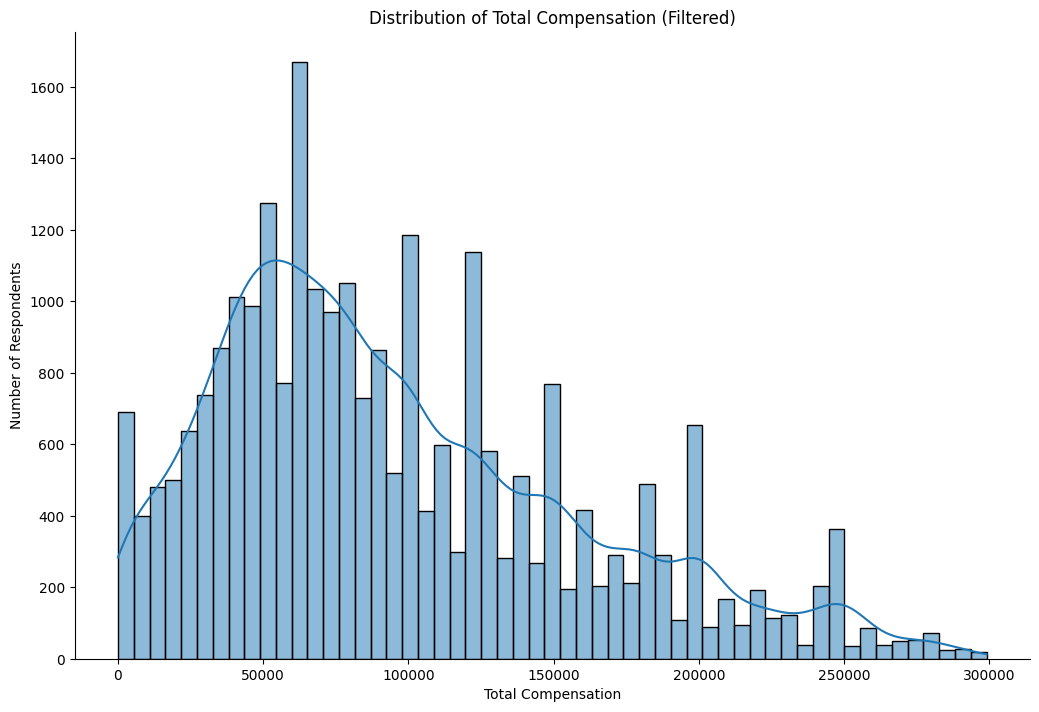

In [31]:
QUERY = """
SELECT CompTotal
FROM main
"""

# Read the SQL query
df = pd.read_sql_query(QUERY, conn)

# Plot the histogram
import seaborn as sns
import matplotlib.pyplot as plt

# Filter to remove very high compensation values
df_filtered = df[df["CompTotal"] < 300000]

sns.displot(data=df_filtered, x="CompTotal", height=7, aspect=1.5, kde=True)
plt.title("Distribution of Total Compensation (Filtered)")
plt.xlabel("Total Compensation")
plt.ylabel("Number of Respondents")
plt.show()


#### Insight: Total Compensation

Most developers earn between **$30K  and $100K**, with fewer earning above that.  
The distribution is right-skewed, which is typical in salary data due to a small group of high earners.


### Box Plot: Age

We’ll plot a box plot of the `Age` column to explore the distribution, median, and detect any outliers in respondents' age data.


                      Age
0      Under 18 years old
1         35-44 years old
2         45-54 years old
3         18-24 years old
4         18-24 years old
...                   ...
65432     18-24 years old
65433     25-34 years old
65434     25-34 years old
65435     18-24 years old
65436     18-24 years old

[65437 rows x 1 columns]


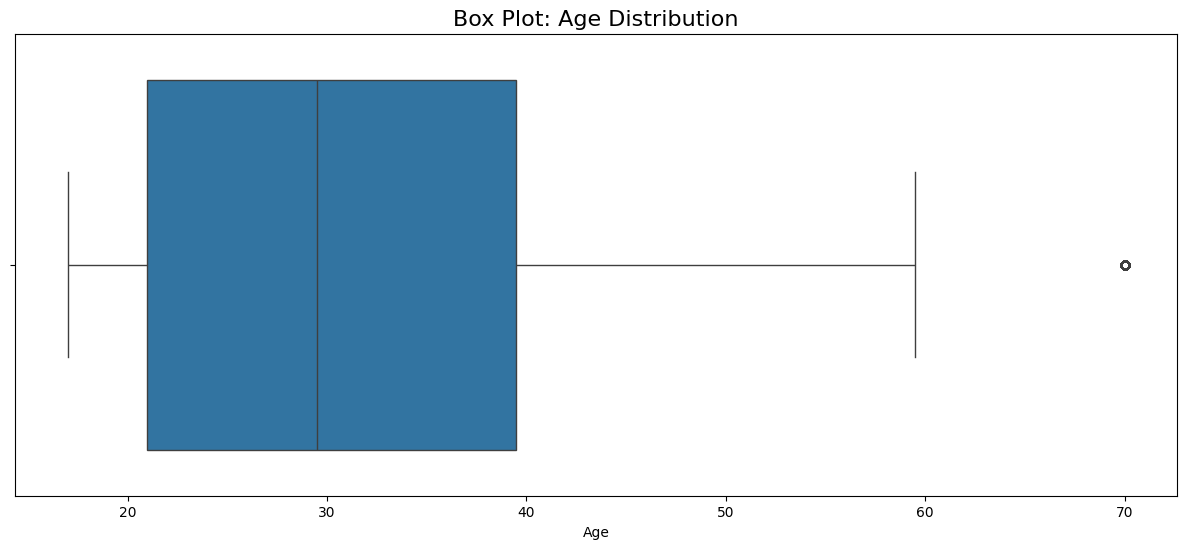

In [34]:
QUERY = """
SELECT Age
FROM main
"""

# Read the SQL Query
df = pd.read_sql_query(QUERY, conn)
print(df)

# Map age ranges to numeric values
age_map = {
    "Under 18 years old": 17,
    "18-24 years old": 21,
    "25-34 years old": 29.5,
    "35-44 years old": 39.5,
    "45-54 years old": 49.5,
    "55-64 years old": 59.5,
    "65 years or older": 70,
    "Prefer not to say": None
}

# Apply mapping
df["Age_num"] = df["Age"].map(age_map)

# Drop NaNs
df_clean = df.dropna(subset=["Age_num"])

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))
sns.boxplot(x=df_clean["Age_num"])
plt.title("Box Plot: Age Distribution", fontsize=16)
plt.xlabel("Age")
plt.show()

#### Insight summary

Most developer respondents are aged between **21 and 40 years**.  
The age distribution is centered around **early 30s**, with a few older outliers above 60.


## Visualizing relationship in Data
### Scatter Plot: Age vs Work Experience

We'll create a scatter plot to visualize the relationship between `Age` and `WorkExp` (Years of Professional Coding Experience).  
This helps identify how experience increases with age and detect any unusual patterns.


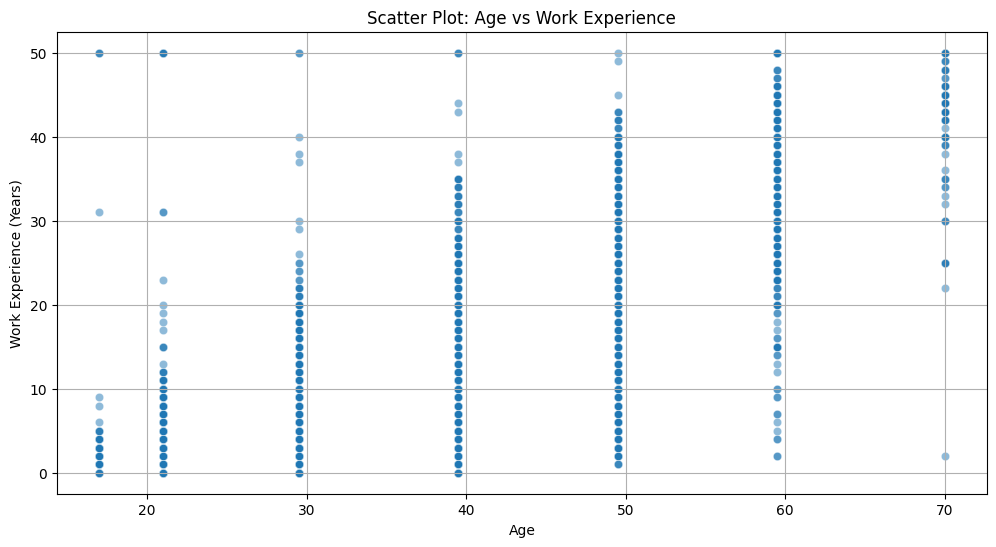

In [38]:
QUERY = "SELECT Age, WorkExp FROM main"
df = pd.read_sql_query(QUERY, conn)

# Map age ranges to numeric
age_map = {
    "Under 18 years old": 17,
    "18-24 years old": 21,
    "25-34 years old": 29.5,
    "35-44 years old": 39.5,
    "45-54 years old": 49.5,
    "55-64 years old": 59.5,
    "65 years or older": 70,
    "Prefer not to say": None
}
df["Age_num"] = df["Age"].map(age_map)

# Clean WorkExp column
def clean_workexp(val):
    if pd.isna(val):
        return None
    if isinstance(val, str):
        if "more than" in val.lower():
            return 50
        elif "less than" in val.lower():
            return 0.5
        else:
            try:
                return float(val)
            except:
                return None
    return val 

df["WorkExp_clean"] = df["WorkExp"].apply(clean_workexp)

# Drop rows with missing values
df_clean = df.dropna(subset=["Age_num", "WorkExp_clean"])

# Plot the Graph
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_clean, x="Age_num", y="WorkExp_clean", alpha=0.5)
plt.title("Scatter Plot: Age vs Work Experience")
plt.xlabel("Age")
plt.ylabel("Work Experience (Years)")
plt.grid(True)
plt.show()


#### Insight Summary

- There is a positive correlation between Age and Work Experience.
- Older respondents tend to report more years of experience.
- A few anomalies (e.g., high experience at young ages) suggest possible data inconsistencies.
- The majority fall within expected age and experience ranges.


### Bubble Plot: Time Searching vs Frustration

This chart shows how time spent searching relates to frustration, with bubble size representing age. Larger bubbles = older respondents.


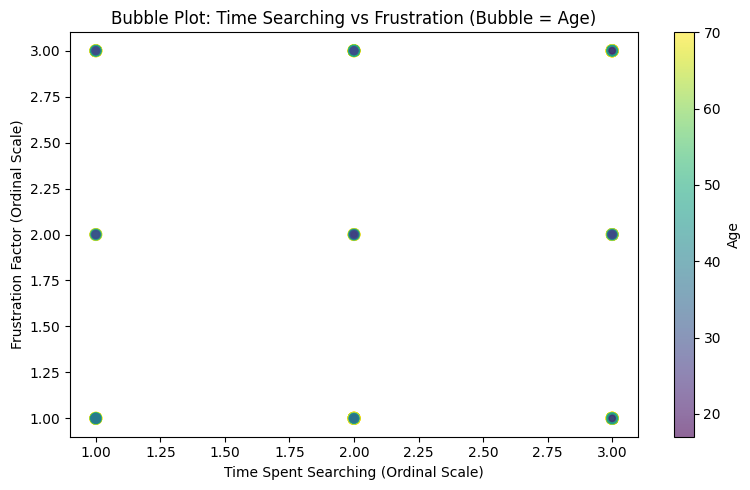

In [47]:
QUERY = """
SELECT Age, TimeSearching, Frustration
FROM main
"""

df = pd.read_sql_query(QUERY, conn)

df["Age_num"] = df["Age"].map(age_map)


# Map categorical values to numeric (ordinal) scales
df["TimeSearching_ord"] = df["TimeSearching"].map({
    "Less than 15 minutes a day": 1,
    "15-30 minutes a day": 2,
    "30-60 minutes a day": 3,
    "More than 1 hour a day": 4
})

# Simplify Frustration mapping to ordinal scale
df["Frustration_ord"] = df["Frustration"].astype(str).apply(
    lambda x: 1 if "technical debt" in x.lower() else 
              2 if "software tools" in x.lower() else 
              3
)

# Drop missing values
df_clean = df.dropna(subset=["Age_num", "TimeSearching_ord", "Frustration_ord"])

# Create the bubble plot
plt.figure(figsize=(8,5))
plt.scatter(
    df_clean["TimeSearching_ord"], 
    df_clean["Frustration_ord"], 
    s=df_clean["Age_num"], 
    c=df_clean["Age_num"], 
    cmap='viridis', 
    alpha=0.6
)
plt.colorbar(label="Age")
plt.xlabel("Time Spent Searching (Ordinal Scale)")
plt.ylabel("Frustration Factor (Ordinal Scale)")
plt.title("Bubble Plot: Time Searching vs Frustration (Bubble = Age)")
plt.tight_layout()
plt.show()


#### Insight Summary :
Most respondents experience similar frustration levels regardless of search time.
No clear trend between age and frustration/time searching — bubbles are evenly spread, indicating frustration is common across age groups and search durations.

### Pie Charts

We will Create a pie chart of the top 5 databases (`DatabaseWantToWorkWith`) that respondents wish to learn next year.


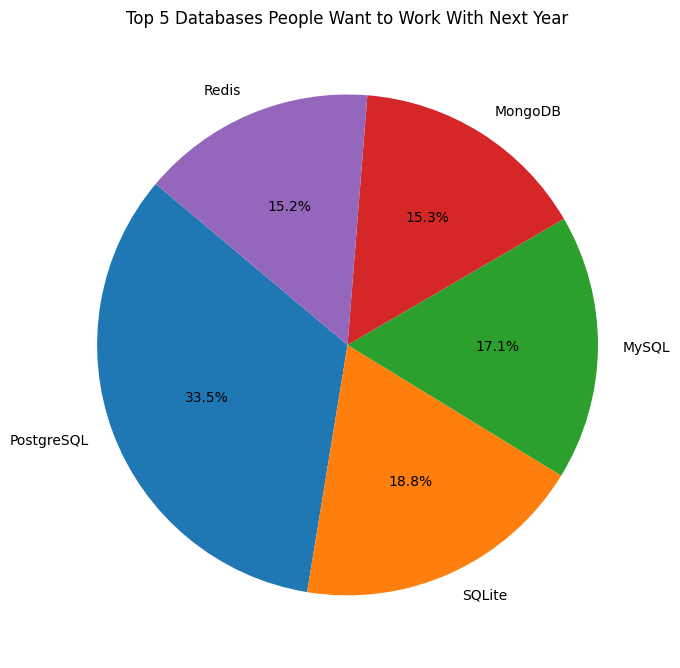

In [50]:
# Load data from SQLite
QUERY = """
SELECT DatabaseWantToWorkWith
FROM main
"""
df = pd.read_sql_query(QUERY, conn)

# Split multiple responses and explode into separate rows
df_split = df['DatabaseWantToWorkWith'].dropna().str.split(';')
df_exploded = df_split.explode()

# Count top 5 most mentioned databases
top5 = df_exploded.value_counts().head(5)

# Plot pie chart
plt.figure(figsize=(7, 7))
plt.pie(top5, labels=top5.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 5 Databases People Want to Work With Next Year")
plt.tight_layout()
plt.show()


#### Insights Summary
- PostgreSQL is the most desired database (33.5%).

- Followed by SQLite, MySQL, MongoDB, and Redis (each around 15–19%).

- Majority of professionals want to upskill with modern relational databases.

### Stacked Charts

we will Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


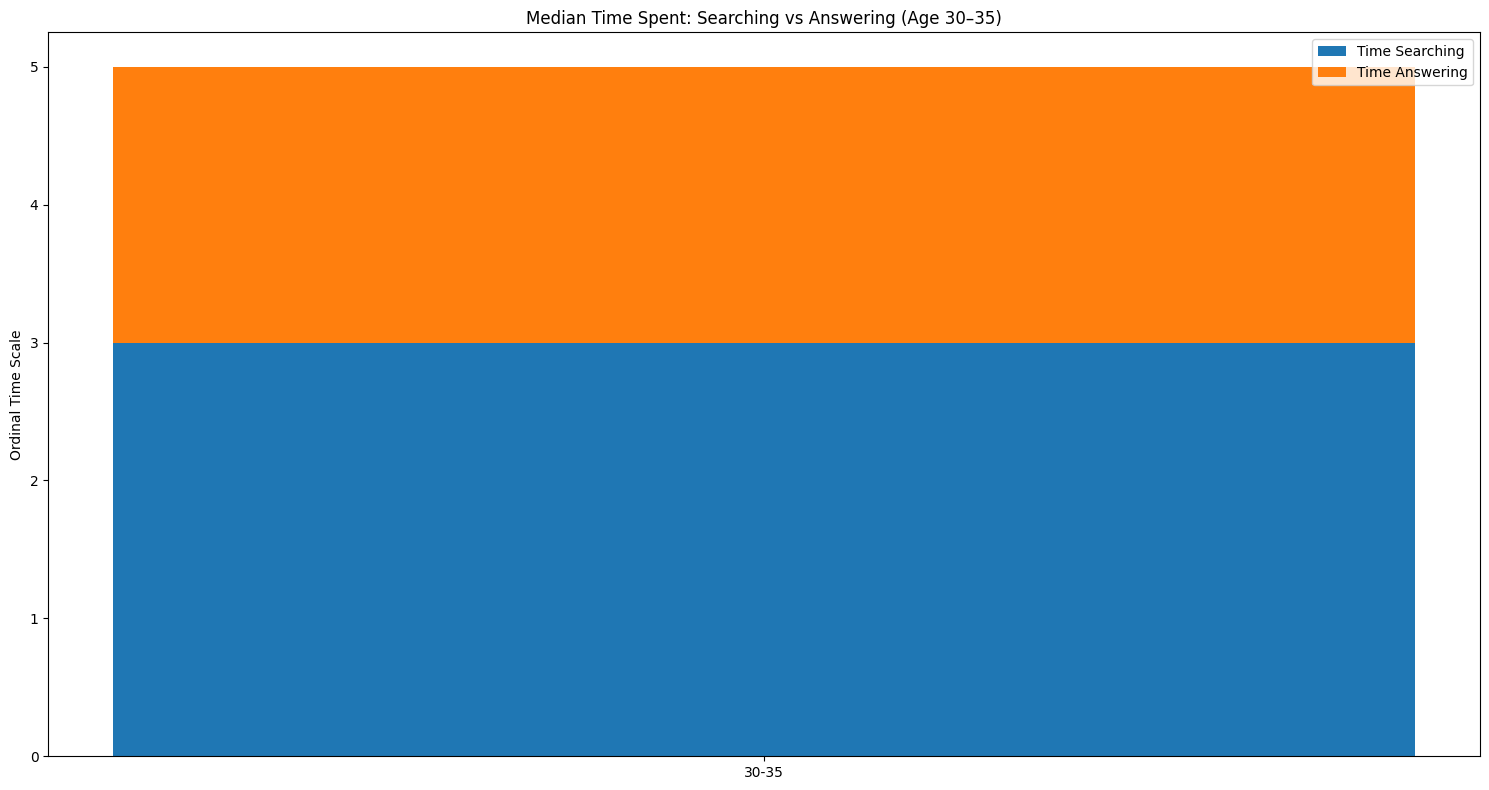

In [52]:
# Load data
QUERY = """
SELECT Age, TimeSearching, TimeAnswering
FROM main
"""
df = pd.read_sql_query(QUERY, conn)

# Filter for 25-34 years (approx. 30–35)
df_filtered = df[df["Age"] == "25-34 years old"].copy()

# Map time to ordinal scale
time_map = {
    "Less than 15 minutes a day": 1,
    "15-30 minutes a day": 2,
    "30-60 minutes a day": 3,
    "More than 1 hour a day": 4
}

df_filtered["TimeSearching_num"] = df_filtered["TimeSearching"].map(time_map)
df_filtered["TimeAnswering_num"] = df_filtered["TimeAnswering"].map(time_map)

# Medians
med_search = df_filtered["TimeSearching_num"].median()
med_answer = df_filtered["TimeAnswering_num"].median()

# Plot
plt.bar(["30-35"], [med_search], label="Time Searching")
plt.bar(["30-35"], [med_answer], bottom=[med_search], label="Time Answering")
plt.title("Median Time Spent: Searching vs Answering (Age 30–35)")
plt.ylabel("Ordinal Time Scale")
plt.legend()
plt.tight_layout()
plt.show()



#### Insights Summary
Median Time Spent:

- Searching: 30–60 mins/day

- Answering: 15–30 mins/day

- They search more than they answer.

## Visualizing Comparison of Data

### Line Chart

now, we will Plot the median `CompTotal` for all ages from 45 to 60.


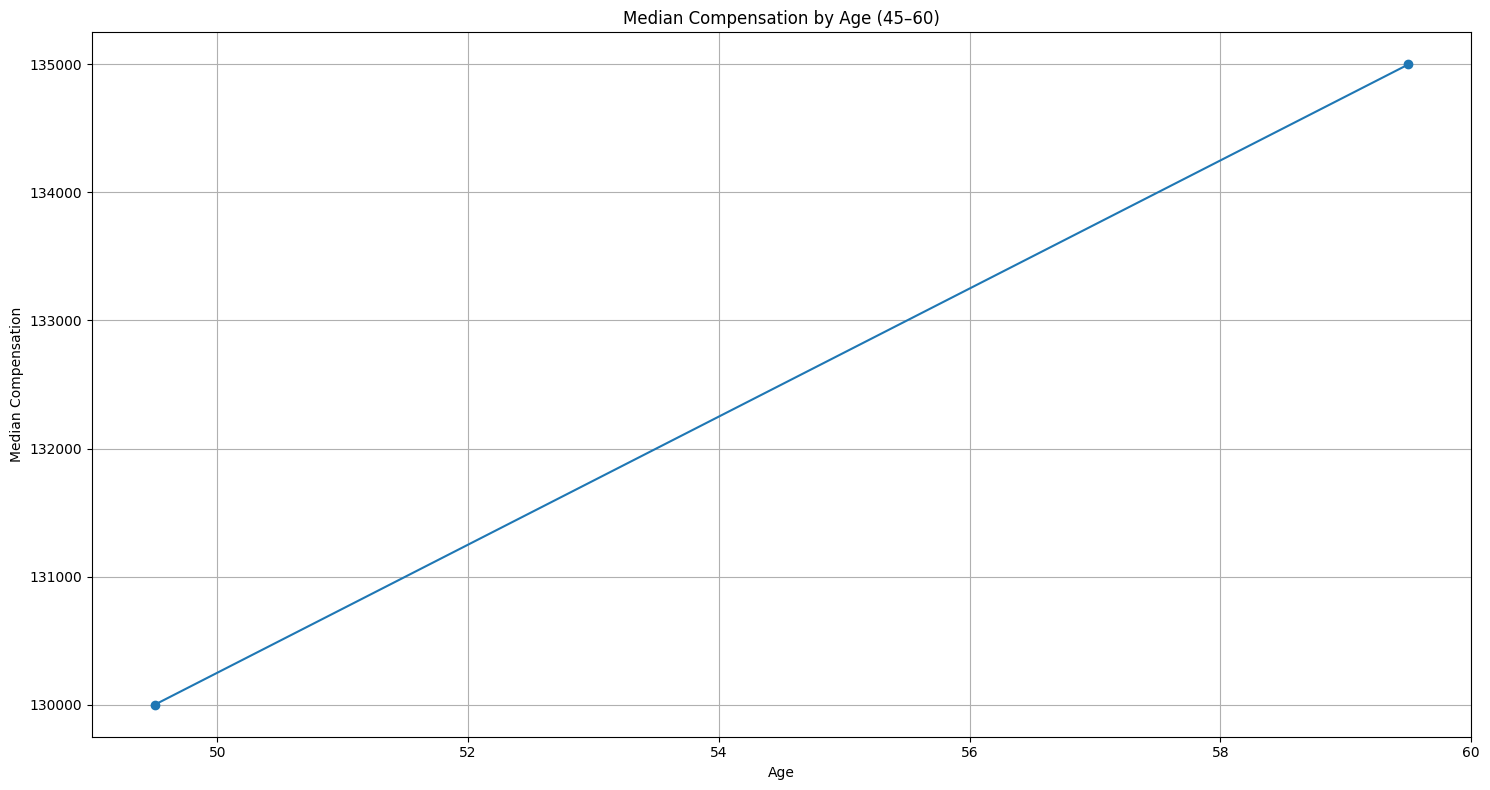

In [53]:
# SQL query filters age groups directly
QUERY = """
SELECT Age, CompTotal
FROM main
WHERE Age IN ('45-54 years old', '55-64 years old')
"""
df = pd.read_sql_query(QUERY, conn)

# Map to numeric age
age_map = {
    "45-54 years old": 49.5,
    "55-64 years old": 59.5
}
df["Age_num"] = df["Age"].map(age_map)

# Median compensation by age
median_comp = df.groupby("Age_num")["CompTotal"].median().sort_index()

# Plot
plt.plot(median_comp.index, median_comp.values, marker='o')
plt.title("Median Compensation by Age (45–60)")
plt.xlabel("Age")
plt.ylabel("Median Compensation")
plt.grid(True)
plt.tight_layout()
plt.show()


#### Insight Summary
- Median compensation increases steadily from age 45 to 60.

- Suggests higher pay with experience and seniority.

### Horizontal Bar Chart


Now, we will Create a horizontal bar chart using the `MainBranch` column.


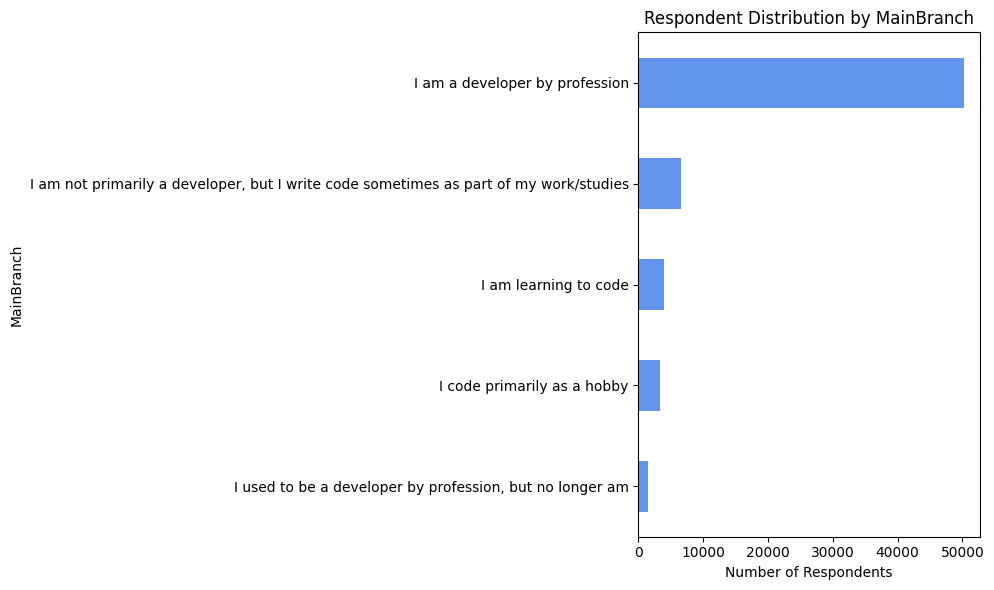

In [63]:
# Reload full column
df = pd.read_sql_query("SELECT MainBranch FROM main", conn)

# Clean & drop NaNs
df["MainBranch"] = df["MainBranch"].str.strip()
df = df.dropna(subset=["MainBranch"])

# Count & plot
branch_counts = df["MainBranch"].value_counts().sort_values()

plt.figure(figsize=(10, 6))
branch_counts.plot(kind='barh', color='cornflowerblue')
plt.title("Respondent Distribution by MainBranch")
plt.xlabel("Number of Respondents")
plt.tight_layout()
plt.show()



#### Insights Summary
The distribution shows which types of developer roles are most common among respondents, helping us understand the dominant professional backgrounds.
